**Homework 7:** *Data-Driven Modeling for Engineers* (ME 2063) - Instructor: H. Babaee,  **Due: 4:00 pm, March 23, 2023.**

Note: You need to submit the notebook file (.ipynb) in canvas. 

Consider the following regression model for noisy measuremetns $(x,y)$ data: 
\begin{equation}
f(x,\Theta) = \theta_0\tanh(\theta_1x+\theta_2) + \theta_3\tanh(\theta_4x+\theta_5) + \theta_6
\end{equation}
where $\Theta=[\theta_0, \theta_1, \dots, \theta_6]$ and $-\pi \leq x \leq \pi$. The objective of this assignment is to train a nonlinear regression model, i.e., to estimate the $\Theta$ after oberrving $(x,y)$ data pairs. You will use gradient descent method to solve the optimization problem.

Let N\_Data denote the number of noisy measurements. The following lines of code generate data by sampling N\_Data points from the y and add $\eta$, which is a zero-mean Gaussian noise, i.e., $\eta \sim \mathcal{N}(0,\sigma^2)$, where $\sigma^2$ is the noise variance.

In [382]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [630]:
N_true = 100
theta = [1, 1, 1, 1, 1, 1, 1]
x_true = np.linspace(-np.pi, np.pi, Nx)
y_true = theta[0]*np.tanh(theta[1]*x+theta[2]) + theta[3]*np.tanh(theta[4]*x+theta[5]) + theta[6]

N_data = 10
sigma  = 1
I = np.random.choice(N_true, N_data)
x_data = x_true[I]
y_data = y_true[I] + (sigma**2)*np.random.normal(size=(N_data,))

1.   The loss function is defined as $E = \frac{1}{N_{Data}} \sum_{i=1}^{N_{Data}}\left(y_{data}^{(i)}-f(x_{data},\Theta)^{(i)}\right)^{2}$. Derive an expression for $\partial E/\partial \Theta$. You need to derive seven equations one for each $\theta_i, i=0, \dots, 6$.

Answer 1.

Given the 2-layer model and loss function:

$$
\begin{align*}
    h(x, \Theta) &= [\theta_1 x + \theta_2 ,\, \theta_4 x + \theta_5] \\
    a(x, \Theta) &= \tanh(h(x, \Theta)) \\
    f(x, \Theta) &= \theta_0 a(x, \Theta)_1 + \theta_3 a(x, \Theta)_2 + \theta_6 \\
    E(\Theta) &= \frac{1}{N} \sum_{i=1}^N (y_i - f(x_i, \Theta))^2
\end{align*}
$$

We can derive the loss gradient by applying the chain rule:

$$
\begin{align*}
    \frac{\partial E}{\partial \Theta} &= \frac{\partial E}{\partial f} \frac{\partial f}{\partial \Theta} \\
    \frac{\partial E}{\partial \Theta} &= \frac{1}{N} \sum_{i=1}^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \Theta} \\
    \frac{\partial E}{\partial \theta_j} &= \frac{1}{N} \sum_{i=1}^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_j}
\end{align*}
$$

For $\theta_0$:
$$
\begin{align*}
    \frac{\partial E}{\partial \theta_0} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_0} \\
    \frac{\partial E}{\partial \theta_0} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) a_{i1} \\
    \frac{\partial E}{\partial \theta_0} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \tanh(\theta_1 x + \theta_2)
\end{align*}
$$

For $\theta_1$:

$$
\begin{align*}
    \frac{\partial E}{\partial \theta_1} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_1} \\
    \frac{\partial E}{\partial \theta_1} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial a_{i1}} \frac{\partial a_{i1}}{\partial h_{i1}} \frac{\partial h_{i1}}{\partial \theta_1} \\
    \frac{\partial E}{\partial \theta_1} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_0 (1 - a_{i1}^2) x_i \\
    \frac{\partial E}{\partial \theta_1} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_0 \left(1 - \tanh(\theta_1 x_i + \theta_2)^2 \right) x_i
\end{align*}
$$

For $\theta_2$:
$$
\begin{align*}
    \frac{\partial E}{\partial \theta_2} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_2} \\
    \frac{\partial E}{\partial \theta_2} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial a_{i1}} \frac{\partial a_{i1}}{\partial h_{i1}} \frac{\partial h_{i1}}{\partial \theta_2} \\
    \frac{\partial E}{\partial \theta_2} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_0 (1 - a_{i1}^2) 1 \\
    \frac{\partial E}{\partial \theta_2} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_0 \left(1 - \tanh(\theta_1 x + \theta_2)^2 \right)
\end{align*}
$$

For $\theta_3$:
$$
\begin{align*}
    \frac{\partial E}{\partial \theta_3} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_3} \\
    \frac{\partial E}{\partial \theta_3} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) a_{i2} \\
    \frac{\partial E}{\partial \theta_3} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \tanh(\theta_4 x + \theta_5)
\end{align*}
$$

For $\theta_4$:
$$
\begin{align*}
    \frac{\partial E}{\partial \theta_4} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_4} \\
    \frac{\partial E}{\partial \theta_4} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial a_{i2}} \frac{\partial a_{i2}}{\partial h_{i2}} \frac{\partial h_{i2}}{\partial \theta_4} \\
    \frac{\partial E}{\partial \theta_4} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_3 (1 - a_{i2}^2) x_i \\
    \frac{\partial E}{\partial \theta_4} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_3 \left(1 - \tanh(\theta_4 x_i + \theta_5)^2 \right) x_i
\end{align*}
$$

For $\theta_5$:
$$
\begin{align*}
    \frac{\partial E}{\partial \theta_5} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_5} \\
    \frac{\partial E}{\partial \theta_5} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial a_{i2}} \frac{\partial a_{i2}}{\partial h_{i2}} \frac{\partial h_{i2}}{\partial \theta_5} \\
    \frac{\partial E}{\partial \theta_5} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_3 (1 - a_{i2}^2) 1 \\
    \frac{\partial E}{\partial \theta_5} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \theta_3 \left(1 - \tanh(\theta_4 x_i + \theta_5)^2 \right)
\end{align*}
$$

For $\theta_6$:
$$
\begin{align*}
    \frac{\partial E}{\partial \theta_6} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) \frac{\partial f_i}{\partial \theta_6} \\
    \frac{\partial E}{\partial \theta_6} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i) 1 \\
    \frac{\partial E}{\partial \theta_6} &= \frac{1}{N} \sum_i^N -2 (y_i - f_i)
\end{align*}
$$

2.    Since this is a nonlinear system of equations, you need to use an iterative algorithm to find where $\partial E/\partial \Theta=0$. To this end use the gradient descent algorithm and write a Python program as in the following: 
   
*   (a): Start with an initial guess value of $\Theta^{(1)}$, where the superscript shows the number of iterations. 

*    (b): Update the values of $\Theta$ using: $\Theta^{(n+1)} = \Theta^{(n)} - \alpha \frac{\partial E}{\partial \Theta^{(n)}}$, where $\alpha$ is the learning rate. 

Text(0.5, 0, 'iteration')

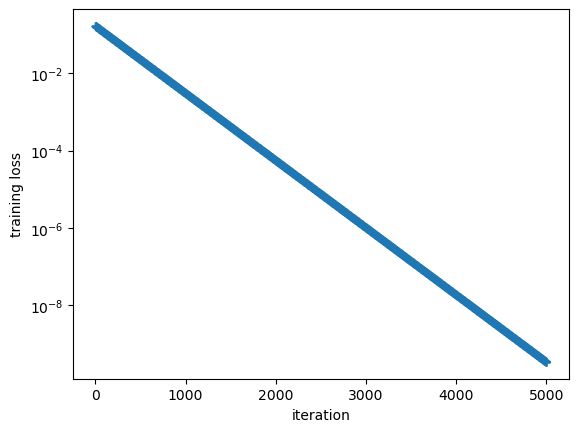

In [601]:
def gd(E, theta0, n_iters=5000, alpha=0.001):
    '''
    Gradient descent algorithm.

    Args:
        E: error and gradient function
        theta0: initial parameter vector
        n_iters: Number of iterations
        alpha: Learning rate
    Returns:
        errors, thetas
    '''
    errors, thetas = [], []
    theta = np.array(theta0)
    for i in range(n_iters + 1):
        error, gradient = E(theta)
        thetas.append(theta)
        errors.append(error)
        if i == n_iters:
            return errors, thetas
        theta = theta - alpha * gradient

# test on simple quadratic function
errors, thetas = gd(lambda x: (x**2, 2*x), theta0=np.random.randn(1))
plt.plot(errors, marker='+')
plt.yscale('log')
plt.ylabel('training loss')
plt.xlabel('iteration')

## Matrix form

Note that we can reformat the parameter vector to express the gradient derivation more concisely in matrix form and easier to implement in numpy:

$$
\begin{align*}
    \Theta^0 &= [[\theta_1, \theta_2]; [\theta_4, \theta_5]] \\
    \Theta^1 &= [\theta_0, \theta_3, \theta_6]
\end{align*}
$$

Let $x' = [x; 1]$ be the function that appends a vector of ones to $x$, to account for bias parameters.

Then using index notation, where summation is implied for indices that only occur on one side:

$$
\begin{align*}
    h(x; \Theta)_{ij} &= x'_{ik} \Theta^0_{jk} \\
    a(x; \Theta)_{ij} &= \tanh(h(x; \Theta)_{ij}) \\
    f(x; \Theta)_i &= a(x; \Theta)'_{ij} \Theta^1_{j} \\
    E(\Theta) &= \frac{1}{N} (y_i - f(x; \Theta)_i)^2
\end{align*}
$$

We can similarly derive the gradient:

$$
\begin{align*}
    \frac{\partial E}{\partial \Theta} &= \frac{\partial E}{\partial f_i} \frac{\partial f_i}{\partial \Theta}
\end{align*}
$$

For $\Theta^1$:

$$
\begin{align*}
    \frac{\partial E}{\partial \Theta^1_j} &= \frac{\partial E}{\partial f_i} \frac{\partial f_i}{\partial \Theta^1_j} \\
    \frac{\partial E}{\partial \Theta^1_j} &= -\frac{2}{N} (y_i - f_i) a'_{ij}
\end{align*}
$$

For $\Theta^0$:

$$
\begin{align*}
    \frac{\partial E}{\partial \Theta^0_{jk}} &= \frac{\partial E}{\partial f_i} \frac{\partial f_i}{\partial \Theta^0_{jk}} \\
    \frac{\partial E}{\partial \Theta^0_{jk}} &=  \frac{\partial E}{\partial f_i} \frac{\partial f_i}{\partial a_{ij}} \frac{\partial a_{ij}}{\partial \Theta^0_{jk}} \\
    \frac{\partial E}{\partial \Theta^0_{jk}} &= \frac{\partial E}{\partial f_i} \frac{\partial f_i}{\partial a_{ij}} \frac{\partial a_{ij}}{\partial h_{ij}} \frac{\partial h_{ij}}{\partial \Theta^0_{jk}} \\
    \frac{\partial E}{\partial \Theta^0_{jk}} &= -\frac{2}{N} (y_i - f_i) \Theta^1_j \left(1 - a_{ij}^2 \right) x'_{ik}
\end{align*}
$$

In [602]:
# helper functions

def print_arrays(**kwargs):
    for k, v in kwargs.items():
        print(f'{k}={v.shape}', end=' ')
    print()

def append_bias(x):
    bias = np.ones((len(x), 1))
    return np.append(x, bias, axis=1)

def format_params(theta):
    theta0 = np.array([
        [theta[1], theta[2]],
        [theta[4], theta[5]]
    ])
    theta1 = np.array([
        theta[0], theta[3], theta[6]
    ])
    return theta0, theta1
    
def flatten_params(theta0, theta1):
    return np.array([
        theta1[0],
        theta0[0][0],
        theta0[0][1],
        theta1[1],
        theta0[1][0],
        theta0[1][1],
        theta1[2]
    ])

In [603]:
nax = np.newaxis

def h(x, theta0):
    '''
    Hidden matmul and gradient.
    '''
    x_bias = append_bias(x[:,nax])
    h_ = np.einsum('ik,jk->ij', x_bias, theta0)
    grad_h = x_bias[:,nax,:] # ijk
    return h_, grad_h

def a(x, theta0):
    '''
    Hidden activation and gradient.
    '''
    h_, grad_h = h(x, theta0)
    a_ = np.tanh(h_)
    da_dh = (1 - a_**2)
    grad_a = np.einsum('ij,ijk->ijk', da_dh, grad_h)
    return a_, grad_a

def f(x, theta0, theta1):
    '''
    2-layer model and gradient.
    '''
    a_, grad_a = a(x, theta0)
    a_bias = append_bias(a_)
    f_ = np.einsum('ij,j->i', a_bias, theta1)
    df_da = theta1[nax,:-1] # ij; omit bias
    grad_f1 = a_bias # ij
    grad_f0 = np.einsum('ij,ijk->ijk', df_da, grad_a)
    return f_, grad_f0, grad_f1

def E(x, y, theta):
    '''
    Loss function and gradient.
    '''
    theta0, theta1 = format_params(theta)
    f_, grad_f0, grad_f1 = f(x, theta0, theta1)
    error = (y - f_)
    E_ = np.mean(error**2)
    dE_df = -2 * error / len(x)
    grad_E0 = np.einsum('i,ijk->jk', dE_df, grad_f0)
    grad_E1 = np.einsum('i,ij->j',   dE_df, grad_f1)
    grad_E = flatten_params(grad_E0, grad_E1)
    return E_, grad_E

# test on ground truth
E(x_true, y_true, theta)

(2.311115933264683e-33,
 array([-7.82839313e-19,  8.83442418e-18, -9.46625867e-18, -7.82839313e-19,
         8.83442418e-18, -9.46625867e-18, -9.99200722e-18]))

Text(0.5, 0, 'x')

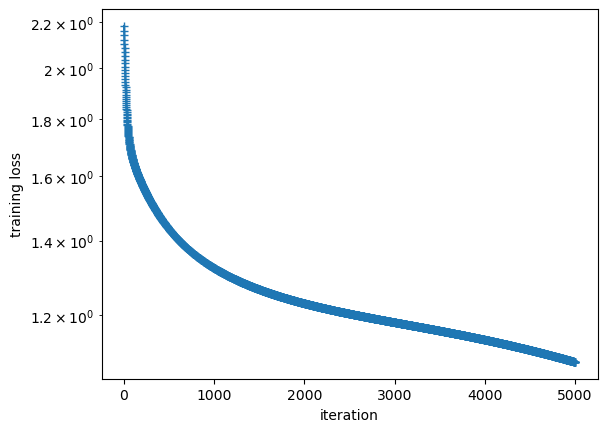

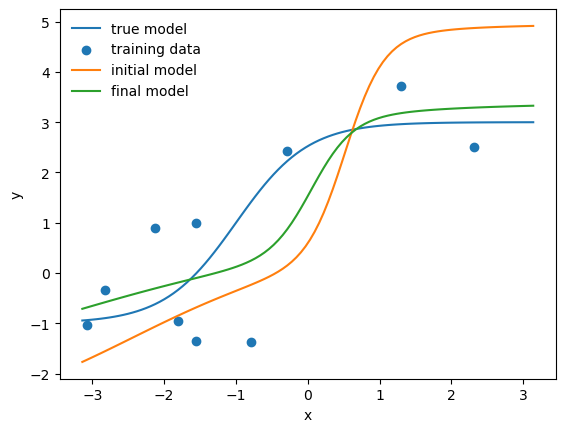

In [605]:
np.random.seed(0)

# fit model to data
errors, thetas = gd(
    lambda t: E(x_data, y_data, theta=t),
    theta0=np.random.randn(7)
)

# plot training curve
plt.plot(errors, marker='+')
plt.yscale('log')
plt.ylabel('training loss')
plt.xlabel('iteration')

# plot initial and final model predictions
y_init = f(x_true, *format_params(thetas[0]))[0]
y_pred = f(x_true, *format_params(thetas[-1]))[0]

plt.figure()
plt.plot(x_true, y_true, label='true model')
plt.scatter(x_data, y_data, label='training data')
plt.plot(x_true, y_init, label='initial model')
plt.plot(x_true, y_pred, label='final model')
plt.legend(frameon=False)
plt.ylabel('y')
plt.xlabel('x')

3.   Consider the following four different models where N\_Data = 10, and $\alpha=0.001$. Repeat step (b) for 5000 iterations for each model and plot the truth, the measurements, the regressed y and optimal $\Theta$ in the title for the last iteration. Legend accordingly and explain the results of four models.

|  | $\Theta^{(1)}$ | $\sigma$ |
| :---: | :----: | :----: |
| Model 1 | [1.015, 0.980, 0.990, 1.020, 0.975, 1.010, 1.030] | 0. |
| Model 2 | [1.430, 0.671, 1.852, 1.018, 1.519, 1.824, 1.783] | 0. |
| Model 3 | [1.015, 0.980, 0.990, 1.020, 0.975, 1.010, 1.030] | 1. |
| Model 4 | [1.430, 0.671, 1.852, 1.018, 1.519, 1.824, 1.783] | 1. |


0 8.502163871308646e-06
1 0.015276925306709498
2 1.9231701678878221
3 0.7917696154501266


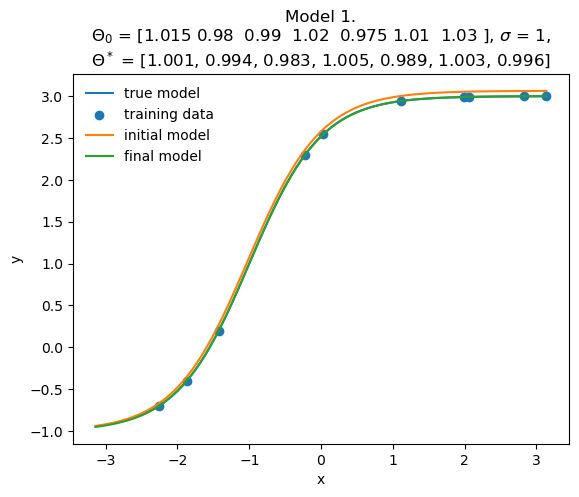

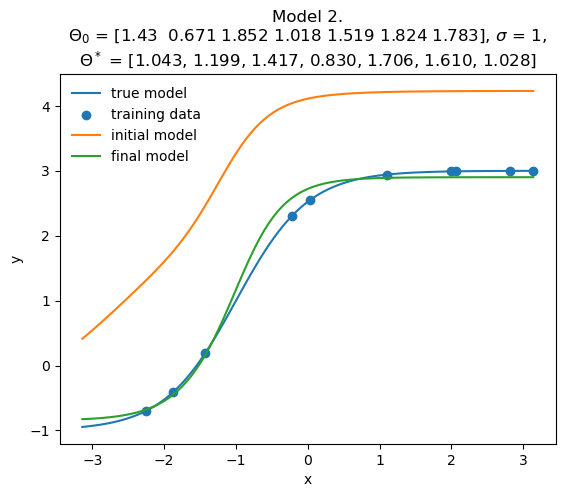

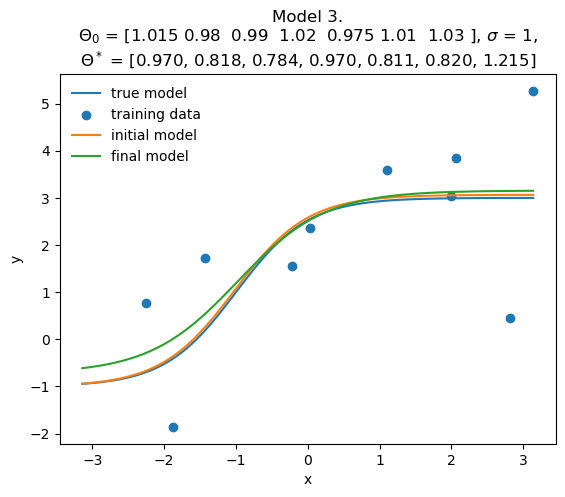

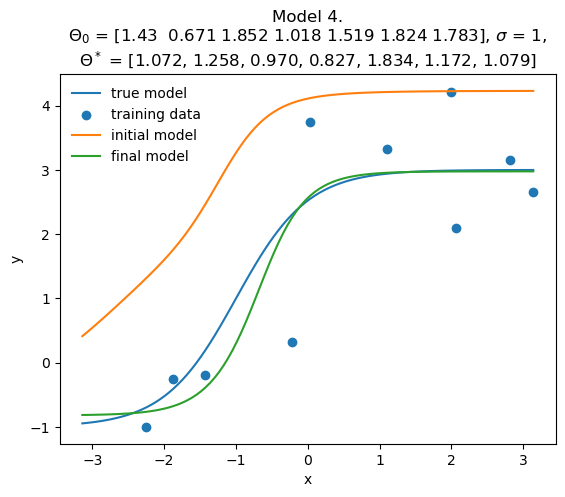

In [631]:
np.random.seed(0)

thetas = np.array([
    [1.015, 0.980, 0.990, 1.020, 0.975, 1.010, 1.030],
    [1.430, 0.671, 1.852, 1.018, 1.519, 1.824, 1.783],
    [1.015, 0.980, 0.990, 1.020, 0.975, 1.010, 1.030],
    [1.430, 0.671, 1.852, 1.018, 1.519, 1.824, 1.783]
])
sigmas = [0, 0, 1, 1]

for i, theta0 in enumerate(thetas):
    x_data_i = x_true[I]
    y_data_i = y_true[I] + (sigmas[i]**2)*np.random.normal(size=(N_data,))
    errors, thetas = gd(lambda t: E(x_data_i, y_data_i, theta=t), theta0)
    print(i, errors[-1])
    
    # plot initial and final model predictions
    y_init = f(x_true, *format_params(thetas[0]))[0]
    y_pred = f(x_true, *format_params(thetas[-1]))[0]

    plt.figure()
    theta_star = '[{}]'.format(', '.join(['{:.3f}'.format(t) for t in thetas[-1]]))
    plt.title('Model {}.\n$\Theta_0$ = {}, $\sigma$ = {},\n$\Theta^*$ = {}'.format(i+1, theta0, sigma, theta_star))
    plt.plot(x_true, y_true, label='true model')
    plt.scatter(x_data_i, y_data_i, label='training data')
    plt.plot(x_true, y_init, label='initial model')
    plt.plot(x_true, y_pred, label='final model')
    plt.legend(frameon=False)
    plt.ylabel('y')
    plt.xlabel('x')

In model 1, the initial parameters were very close to the true parameters of the data-generating model, and the training data was not corrupted by noise. The neural network was able to fit the training data extremely accurately, and the fit parameters were close to the true ones.

In model 2, the initial parameters were farther from the true parameters, but the training data still had no noise. In this case, the neural network still fit the training data very accurately, but the resulting model was slightly farther from the true model due to the worse initialization.

In model 3, the initial parameters were close to the true parameters, but the training data was very noisy. The model wasn't able to fit the training data as well because due to the high level of noose. Furthermore, by trying to fit to the noisy data, the parameters actually moved farther away from the true model during training.

In model 3, the initial parameters were farther from the true parameters, and the training data had additive noise. The model was again not able to fit the noisy training data very well, but the final model was much closer to the true model than it was at initialization.

This shows that neural networks trained with gradient descent 1) are highly sensitive to initialization and 2) tend to fit noise in the training data, which can hurt generalizability.
